# Pandas and Finance

## Core Pandas Time Methods

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

In [2]:
myyear = 2015
mymonth = 1
myday = 1
myhour = 2
mymin = 30
mysec = 15

In [5]:
mydate = datetime(myyear, mymonth, myday)

In [6]:
mydate

datetime.datetime(2015, 1, 1, 0, 0)

In [7]:
mydatetime = datetime(myyear, mymonth, myday, myhour, mymin, mysec)

In [8]:
mydatetime

datetime.datetime(2015, 1, 1, 2, 30, 15)

In [9]:
mydatetime.year

2015

In [10]:
myser = pd.Series(['Nov 3, 1990','2000-01-01',None])

In [11]:
myser

0    Nov 3, 1990
1     2000-01-01
2           None
dtype: object

In [13]:
myser[0] # it just returns a string object of a date. But how do we get it as a dat object?

'Nov 3, 1990'

In [15]:
timeser = pd.to_datetime(myser) #powerful method, now we get date objects

In [16]:
timeser

0   1990-11-03
1   2000-01-01
2          NaT
dtype: datetime64[ns]

In [17]:
timeser[0].year

1990

In [18]:
obvi_euro_date = '31-12-2000'

In [19]:
pd.to_datetime(obvi_euro_date) #here it correctly formats the obvious european date
# since a month can't be 31

C:\Users\iliaa\AppData\Local\Temp\ipykernel_28404\163700324.py:1: UserWarning: Parsing '31-12-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  pd.to_datetime(obvi_euro_date)


Timestamp('2000-12-31 00:00:00')

In [20]:
euro_date = '10-12-2000'

In [21]:
pd.to_datetime(euro_date)

Timestamp('2000-10-12 00:00:00')

In [23]:
pd.to_datetime(euro_date,dayfirst=True) # we need to specify that the day is first
# now, we will get the correct date

Timestamp('2000-12-10 00:00:00')

In [24]:
style_date = '12--Dec--2000' #weird formatting of a date

In [25]:
# how do tell the .to_datetime() object how the format is
pd.to_datetime(style_date,format='%d--%b--%Y') # the keyword for the format is found in the section notes

Timestamp('2000-12-12 00:00:00')

In [26]:
custom_date = '12th of Dec 2000'

In [27]:
pd.to_datetime(custom_date)

Timestamp('2000-12-12 00:00:00')

In [30]:
sales = pd.read_csv('RetailSales_BeerWineLiquor.csv')

In [31]:
sales

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
335,2019-12-01,6630
336,2020-01-01,4388
337,2020-02-01,4533
338,2020-03-01,5562


In [32]:
sales['DATE'] # the date column is treated as a string object

0      1992-01-01
1      1992-02-01
2      1992-03-01
3      1992-04-01
4      1992-05-01
          ...    
335    2019-12-01
336    2020-01-01
337    2020-02-01
338    2020-03-01
339    2020-04-01
Name: DATE, Length: 340, dtype: object

In [33]:
# this is how we convert the string DATE column to a dateimte object
sales['DATE'] = pd.to_datetime(sales['DATE'])

In [34]:
sales

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
335,2019-12-01,6630
336,2020-01-01,4388
337,2020-02-01,4533
338,2020-03-01,5562


In [35]:
sales['DATE']

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
335   2019-12-01
336   2020-01-01
337   2020-02-01
338   2020-03-01
339   2020-04-01
Name: DATE, Length: 340, dtype: datetime64[ns]

In [36]:
sales['DATE'][0].year

1992

In [39]:
# we can also parse dates right when we read a in a document
sales = pd.read_csv('RetailSales_BeerWineLiquor.csv',parse_dates=[0])
sales

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
335,2019-12-01,6630
336,2020-01-01,4388
337,2020-02-01,4533
338,2020-03-01,5562


In [40]:
sales = sales.set_index("DATE") # we set our date column as the index

In [42]:
sales.resample(rule='A').mean()
# A for the rule param means resample the date and group them by YEAR
# the different symbols for the Rules in the course section notes

,MRTSSM4453USN
DATE,
1992-12-31,1807.250000
1993-12-31,1794.833333
1994-12-31,1841.750000
1995-12-31,1833.916667
1996-12-31,1929.750000
1997-12-31,2006.750000
1998-12-31,2115.166667
1999-12-31,2206.333333
2000-12-31,2375.583333


In [44]:
sales = pd.read_csv('RetailSales_BeerWineLiquor.csv',parse_dates=[0])

In [45]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           340 non-null    datetime64[ns]
 1   MRTSSM4453USN  340 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [48]:
# We can use the Datetime attributes from pandas by calling
# .dt method on Datetime objects
sales['DATE'].dt.year

0      1992
1      1992
2      1992
3      1992
4      1992
       ... 
335    2019
336    2020
337    2020
338    2020
339    2020
Name: DATE, Length: 340, dtype: int64

## Pandas Visualizations

In [54]:
df = pd.read_csv('DATA\FB.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-06,126.669998,129.940002,126.470001,129.729996,129.729996,26278400
1,2016-09-07,130.039993,131.979996,129.949997,131.050003,131.050003,27990800
2,2016-09-08,130.919998,131.080002,129.809998,130.270004,130.270004,15676600
3,2016-09-09,129.710007,129.949997,127.099998,127.099998,127.099998,27100700
4,2016-09-12,125.959999,128.759995,125.750000,128.690002,128.690002,21252800
...,...,...,...,...,...,...,...
1253,2021-08-27,365.100006,373.739990,364.079987,372.630005,372.630005,11214200
1254,2021-08-30,372.559998,381.489990,370.519989,380.660004,380.660004,13547300
1255,2021-08-31,379.950012,382.760010,378.799988,379.380005,379.380005,12345400
1256,2021-09-01,379.589996,384.329987,378.809998,382.049988,382.049988,11567200


<AxesSubplot:>

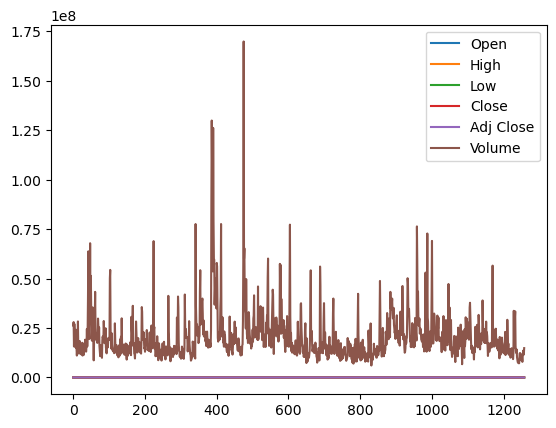

In [56]:
df.plot() # this doesnt make sense because we have different units for our columns

<AxesSubplot:>

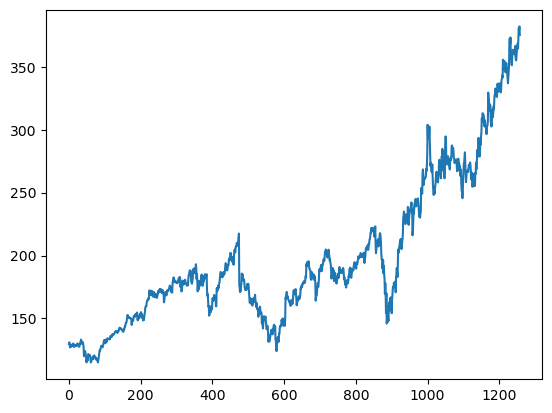

In [58]:
# it makes more sense to plot one column at a time
df['Adj Close'].plot() # plots using the num index (1,2,3,...) as the x-axis

<AxesSubplot:>

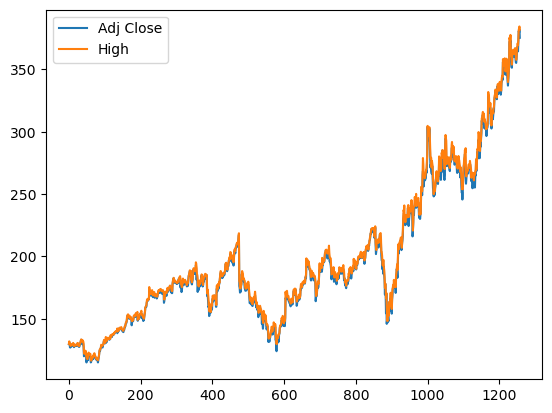

In [60]:
# to plot 2 or more cols, we need to pass in a LIST of cols
df[['Adj Close','High']].plot() #passing a list of cols to be plotted


<AxesSubplot:>

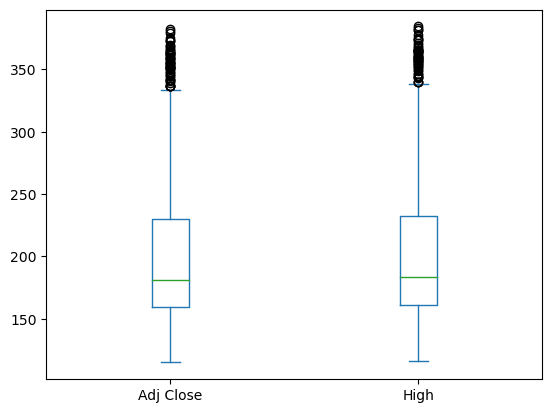

In [66]:
df[['Adj Close','High']].plot(kind='box') # we can choose differnt types of plots by using the kind param

<AxesSubplot:>

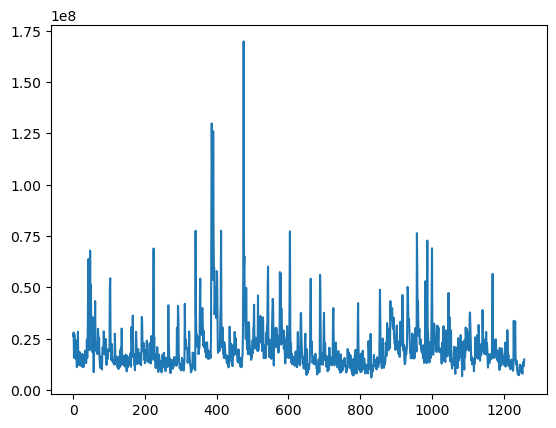

In [67]:
df['Volume'].plot()

<AxesSubplot:ylabel='Frequency'>

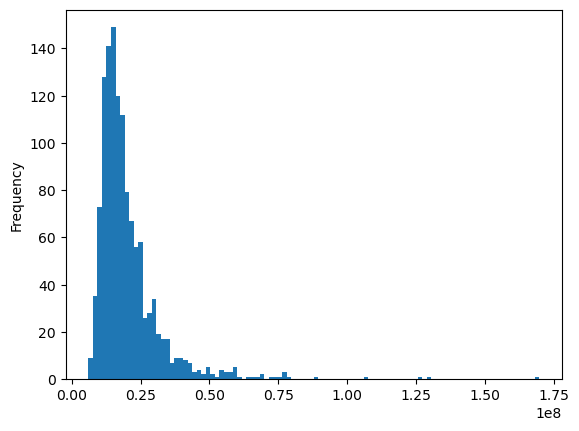

In [71]:
df['Volume'].plot(kind='hist',bins=100)
# histogram is for seeing frequency counts or distributions for any data

<AxesSubplot:ylabel='Density'>

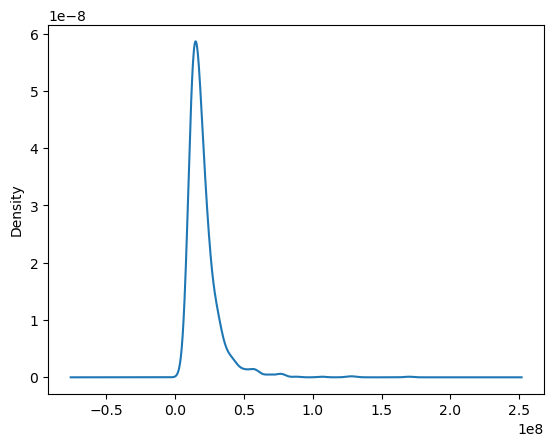

In [72]:
df['Volume'].plot(kind='kde')
# calculates a probability function for the data

<AxesSubplot:>

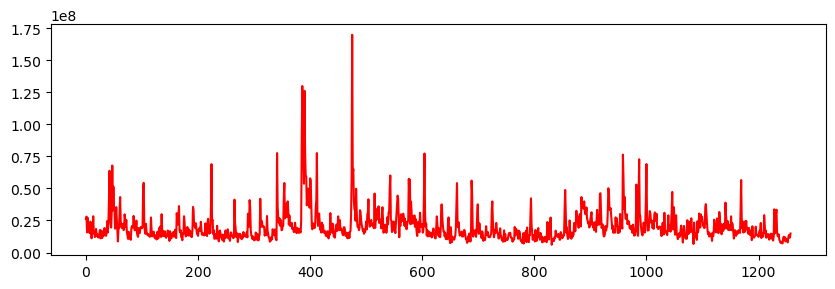

In [74]:
df['Volume'].plot(kind='line',c='red',figsize=(10,3))
# we can pass in some matplotlib params and funcs into the .plot() method of pandas

In [75]:
import matplotlib.pyplot as plt

<AxesSubplot:>

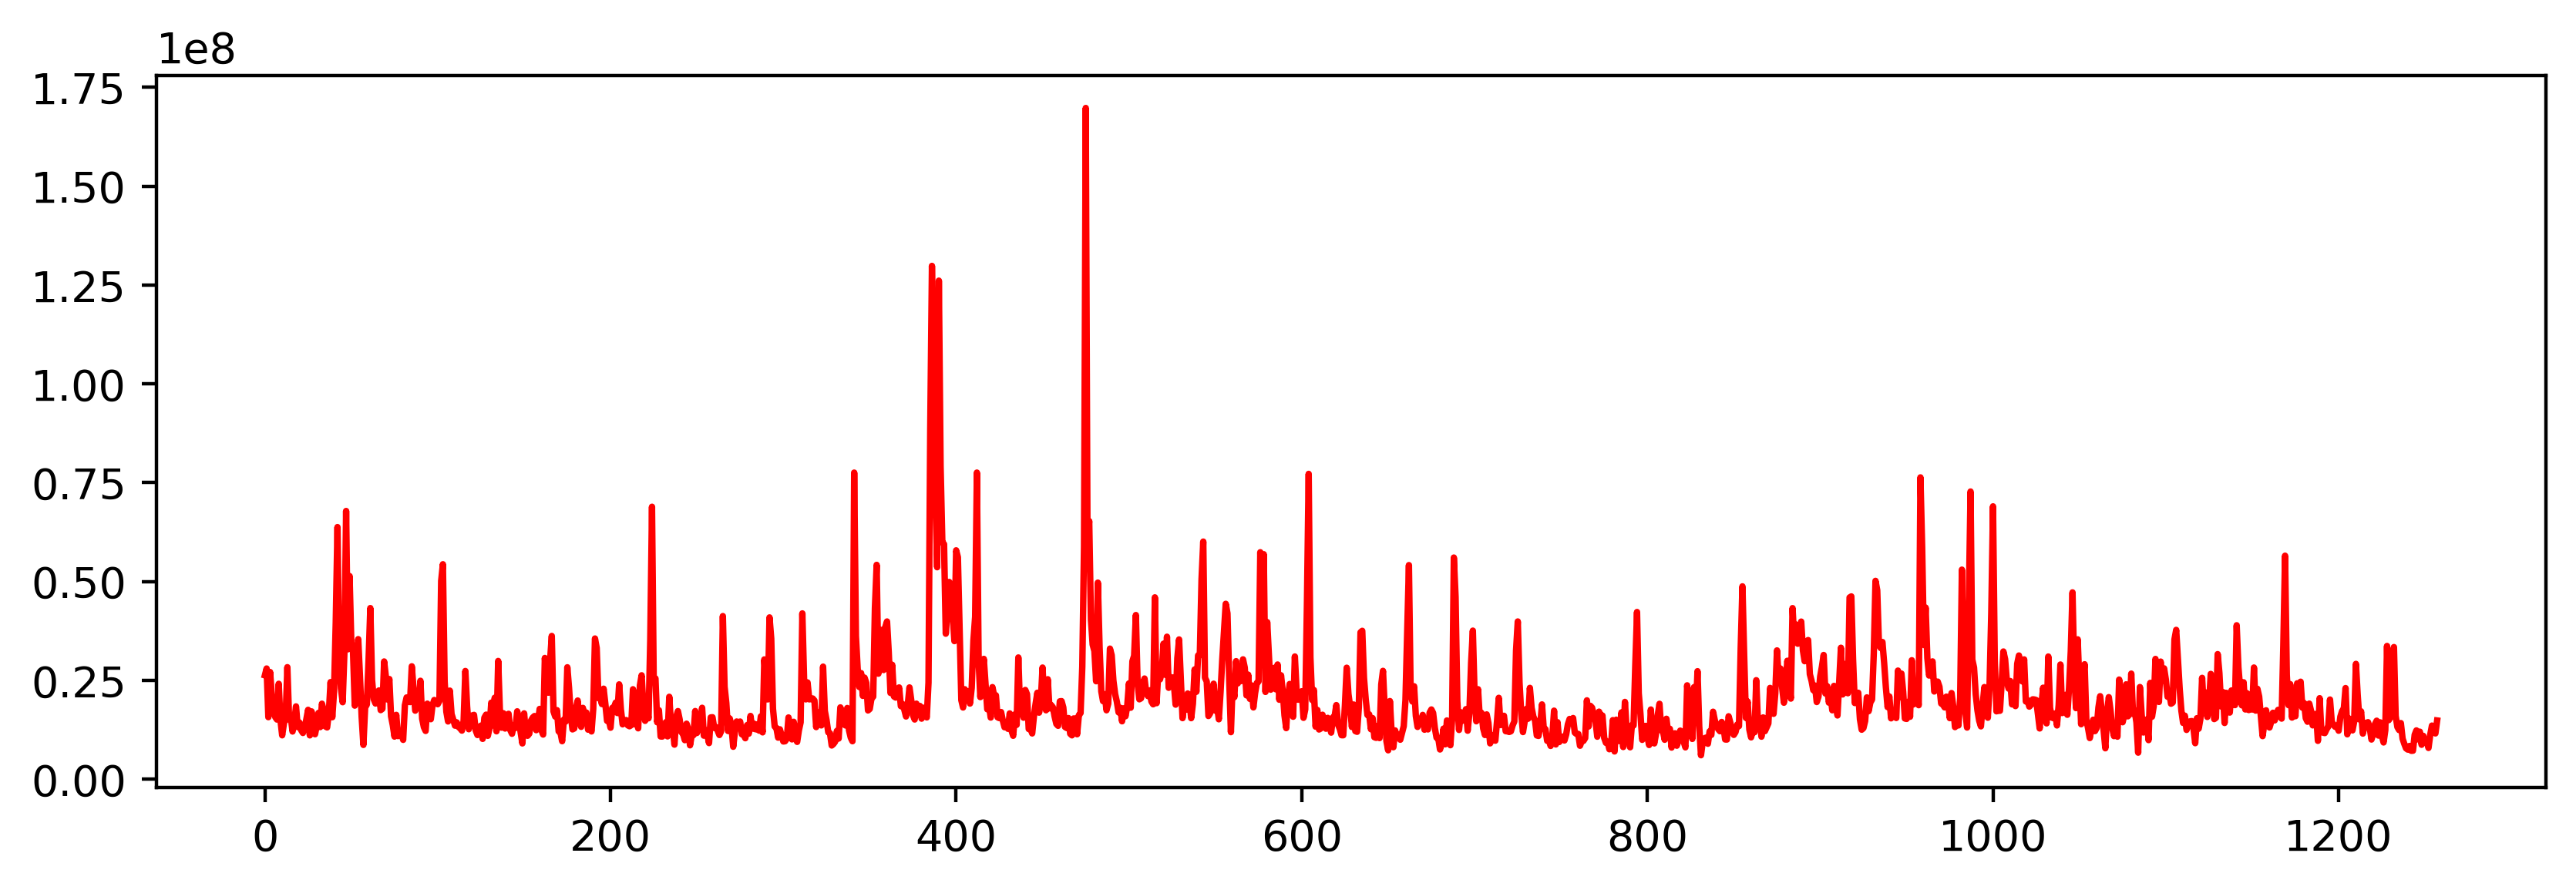

In [77]:
# we can call plt.figure() in the same line as a our pandas plot to use
# the full matplotlib features
plt.figure(figsize=(10,3),dpi=400)
df['Volume'].plot(kind='line',c='red')

In [78]:
new_df = pd.read_csv('DATA/TGT.csv')

In [79]:
new_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-06,70.879997,70.959999,69.570000,70.099998,60.674061,8235200
1,2016-09-07,69.940002,70.419998,69.809998,70.300003,60.847187,5131500
2,2016-09-08,70.300003,70.300003,69.419998,69.459999,60.120117,9141200
3,2016-09-09,69.040001,69.419998,68.750000,69.000000,59.721989,6177800
4,2016-09-12,68.449997,69.519997,68.209999,69.300003,59.981625,8167900
...,...,...,...,...,...,...,...
1253,2021-08-27,248.149994,250.470001,247.679993,249.179993,249.179993,2660500
1254,2021-08-30,249.210007,251.380005,249.149994,249.360001,249.360001,2092700
1255,2021-08-31,249.149994,249.600006,245.419998,246.979996,246.979996,3966000
1256,2021-09-01,247.000000,247.550003,244.259995,246.369995,246.369995,2862700


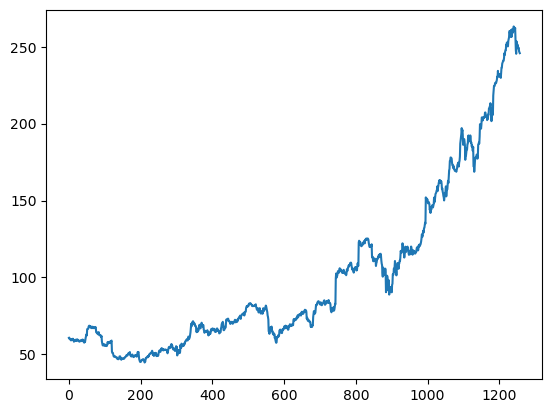

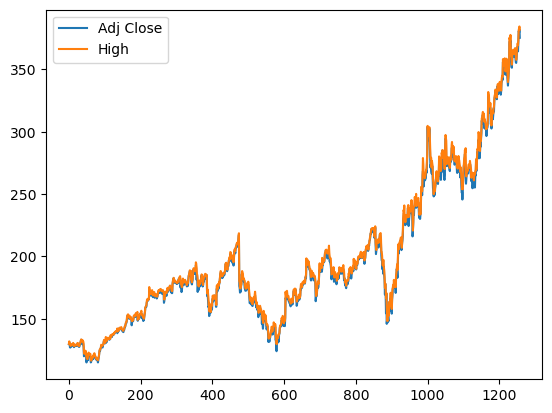

In [84]:
# in jupyter notebook, simple plots in the same cell, most of time will be plotted on the same graph
new_df['Adj Close'].plot(label='TGT')
df[['Adj Close','High']].plot(label='FB')
plt.legend()

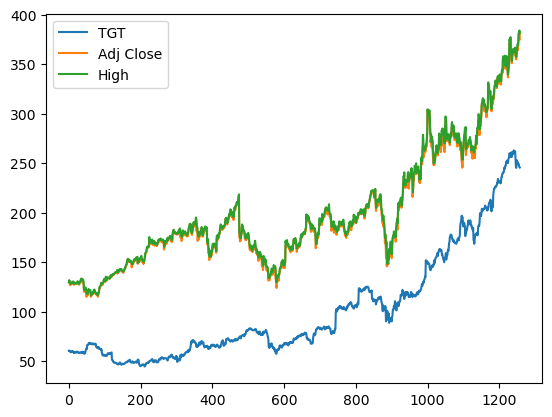

In [85]:
# how we plot multiple things on the same figure
ax = new_df['Adj Close'].plot(label='TGT')
df[['Adj Close','High']].plot(ax=ax)
plt.legend()

- Recommended way to connect multiple plots when they normally wouldn't connect together is using matplotlib's .subplot() method

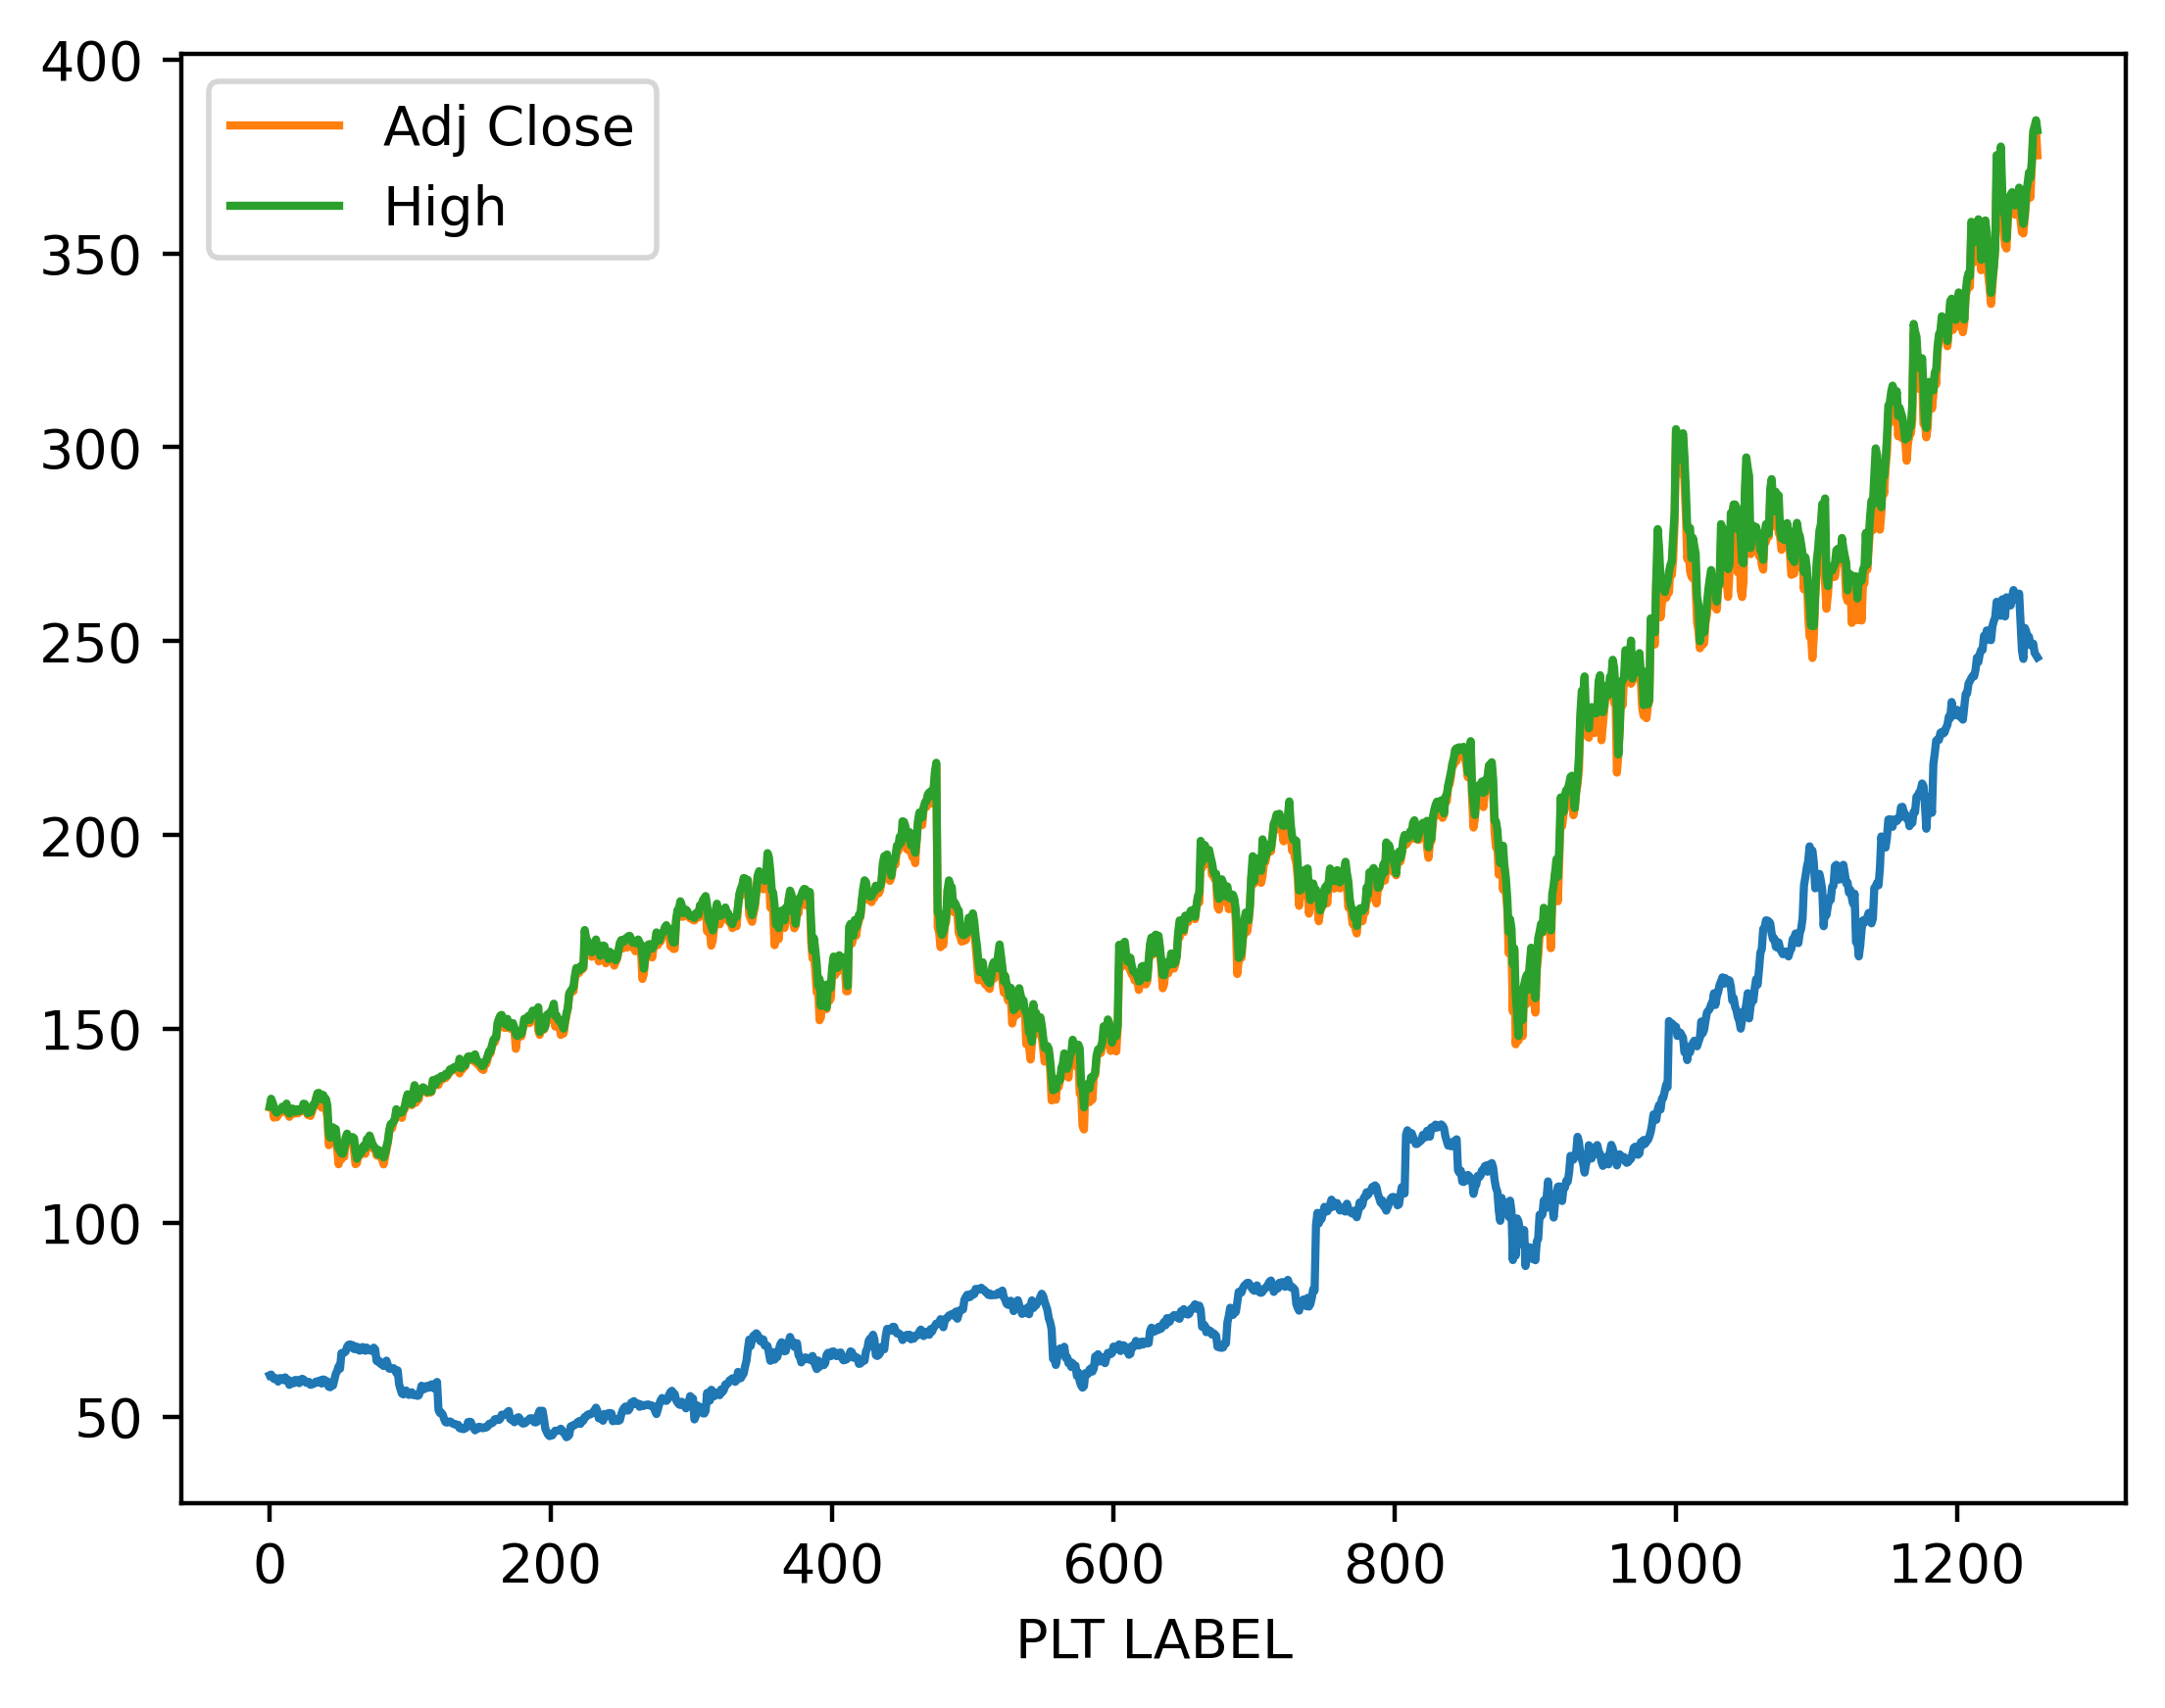

In [88]:
# the RECOMMENDED WAY:
fig,axes = plt.subplots(dpi=400) # we can also use any of the params in the subplots
# that we couldn't normally do in pandas, such as dpi

new_df['Adj Close'].plot(label='TGT', ax=axes)
df[['Adj Close','High']].plot(ax=axes)

plt.xlabel('PLT LABEL')

plt.savefig('my_new_plot.png')